# DS4440 - Practical Neural Networks
## Week 2 : Image Classification using Multi Layer Perceptron

___
**Instructor** : Prof. Steve Schmidt <br/>
**Teaching Assistants** : Vishwajeet Hogale (hogale.v@northeastern.edu) | Chaitanya Agarwal (agarwal.cha@northeastern.edu)

## Problem Statement

Imagine we are working with the Fashion MNIST dataset, a collection of grayscale images representing various fashion items such as shirts, shoes, and bags. By analyzing features such as pixel intensity and patterns in the images, we can uncover insights into how models process and classify visual data.
<br/>

**Our goal is to take an image as an input and predict the class of the fashion item from the dataset.**
<br/>
We will demonstrate **both**:
- **Binary classification** (classes 0 vs. 1, i.e. T-shirt vs. Trouser)
- **Multi-class classification** (all 10 classes)
<br/>
To accomplish this goal, we will use the **Multi Layer Perceptron**.

<br/>


In this notebook, we'll follow the **six** key sections below:
1. **Data Gathering**
2. **Data Wrangling**
3. **Feature Understanding & Preprocessing**
4. **Model Building**


Let's dive in and explore how neural networks can tackle this exciting problem!

## 0. Setup and Load libraries

The below cell helps you download all the necessary libraries or packages required to run this notebook without running into any errors.

In [1]:
! pip install -r ../../requirements.txt

## 1. Data Gathering

### **About the Dataset**

The Fashion MNIST dataset consists of **70,000 labeled grayscale images**, each with a resolution of **28x28 pixels and 10 distinct classes**. This structured dataset allows us to experiment with building and training models, tuning hyperparameters, and evaluating performance.


Each example in the dataset is assigned to one of the following labels:

0 T-shirt/top<br/>
1 Trouser<br/>
2 Pullover<br/>
3 Dress<br/>
4 Coat<br/>
5 Sandal<br/>
6 Shirt<br/>
7 Sneaker<br/>
8 Bag<br/>
9 Ankle boot
<br/>
<br/>

**Dataset Source**
<br/>
The Fashion MNIST Dataset is a very popular dataset, which is already present in the torch library. What we're going to do is that we will fetch this dataset from torch and download it in our current working directory.
<br/><br/>

**What is the below cell doing?**<br/>
The below cell reads the Fashion MNIST dataset from the Datasets folder in the repository.



In [2]:
import pandas as pd
import numpy as np

# Load the Fashion MNIST dataset from torch
df = pd.read_csv("../../Datasets/FashionMNIST.csv", index_col=0)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_mnist_classes = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

In [5]:
# Get the labels from the dataset
labels = df.iloc[:,-1].values

target_values = []
for i in labels:
    target_values.append(fashion_mnist_classes[i])

df["fashion_class"] = target_values


df.head()

,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,target,fashion_class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,Ankle boot
1,0,0,0,0,0,1,0,0,0,0,...,130,76,0,0,0,0,0,0,0,T-shirt/top
2,0,0,0,0,0,0,0,0,0,22,...,1,0,0,0,0,0,0,0,0,T-shirt/top
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,3,Dress
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T-shirt/top


### Visualize an image from the dataset

#### What does display_image do?
- Input: It takes a single example (row) from the dataset where each image is represented as a flattened vector of size 784 x 1 (28x28 pixels stored in one dimension).
- Reshaping: It reshapes the flattened vector into a 28 x 28 matrix, which represents the actual 2D structure of the image.
- Display: It visualizes the reshaped 28x28 image using a grayscale colormap to show how the image looks.

In [6]:
import matplotlib.pyplot as plt
def display_image(row, image_no, df_temp):
    # Ensure the data is a NumPy array
    image_array = np.array(row, dtype=float)

    # Reshape the flattened image into 28x28
    reshaped_image = image_array.reshape(28, 28)

    # Display the image using matplotlib
    plt.figure(figsize=(4, 4))
    plt.imshow(reshaped_image, cmap='gray')
    plt.title(f"Fashion Class : {df_temp['fashion_class'][image_no]}")
    plt.axis('off')  # Turn off axis labels
    plt.show()

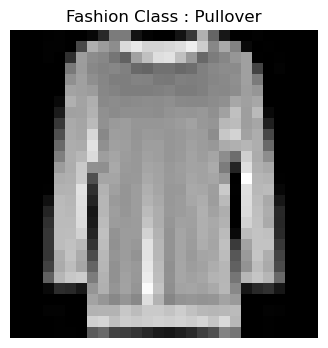

In [7]:
image_no = 199
display_image(df.iloc[image_no, :784], image_no, df)

## 2. Data Wrangling

### Check the size of the training dataset

In [8]:
print(f"The dataset has {df.shape[0]} images")

The dataset has 60000 images


### Explore the class distribution in all the fashion class labels

In [9]:
unique_labels, counts = list(fashion_mnist_classes.values()), df.groupby(["fashion_class"]).size().values

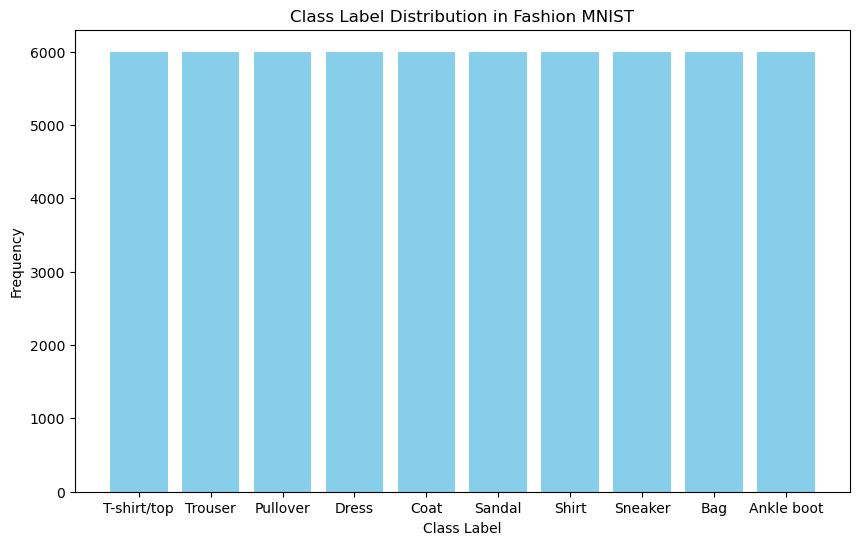

In [10]:
# Plot the class distribution as a bar chart
plt.figure(figsize=(10,6))
plt.bar(unique_labels, counts, color='skyblue')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Class Label Distribution in Fashion MNIST')
plt.xticks(unique_labels)  # Set x-ticks to be the class labels
plt.show()

#### Insights
- There are 6000 images in each fashion item class which makes it a well distributed dataset without any class imbalance.

## 3. Feature Understanding and Preprocessing


This code defines two classes to handle datasets in PyTorch:

1. **BinaryDataset**  
   For problems where fashion classes/labels are either T-shirt or Trouser  
   - Converts `data` and `labels` into `float32` tensors.
   - These tensors are data structures that any PyTOrch model understands.

2. **MultiClassDataset**  
   For problems with multiple categories like T-shirt, Shoes, Trousers, etc.   
   - Converts `data` and `labels` into `long` tensors.
   - These tensors are data structures that any PyTOrch model understands.

Both classes let you:
- Get the size of the dataset (`__len__`).
- Access a specific data point and label (`__getitem__`).

In [11]:
import torch
from torch.utils.data import Dataset, DataLoader
class BinaryDataset(Dataset):
    def __init__(self, data, labels):
        self.data = torch.tensor(data.values, dtype=torch.float32)  # Convert to tensor
        self.labels = torch.tensor(labels.values, dtype=torch.float32)  # Convert to tensor

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

class MultiClassDataset(Dataset):
    def __init__(self, data, labels):
        self.data = torch.tensor(data.values, dtype=torch.float32)  # Convert to tensor
        self.labels = torch.tensor(labels.values, dtype=torch.long)  # Convert to tensor

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]



## 4. Model Building

### **Binary Classification**

In this task, we're going to pick any two classes from the fashion MNIST dataset and show how to use Binary Cross Entropy Loss for the binary predictions using MLP.

In [12]:
# Let's assume we only take fashion class 0 and 1 for binary classification
# filter the training dataset on fashion class 0 and 1
df_bin = df[(df["target"] == 0) | (df["target"] == 1)] # This gets all rows that represent fashion items that belong to class 0 or 1

In [13]:
df_bin.head()

,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,target,fashion_class
1,0,0,0,0,0,1,0,0,0,0,...,130,76,0,0,0,0,0,0,0,T-shirt/top
2,0,0,0,0,0,0,0,0,0,22,...,1,0,0,0,0,0,0,0,0,T-shirt/top
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T-shirt/top
10,0,0,0,0,0,0,0,11,142,200,...,158,18,0,3,0,0,0,0,0,T-shirt/top
16,0,0,0,0,0,0,0,0,0,53,...,107,0,0,0,0,0,0,0,1,Trouser


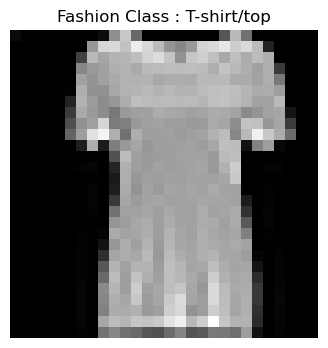

In [14]:
image_no = 3
df_bin = df_bin.reset_index()
display_image(df_bin.iloc[image_no, :784].values, image_no, df_bin)

In [15]:
# Assuming `df` has the image data and the 'fashion_class' column as the labels
X = df_bin.drop(columns=['fashion_class', 'target','index'])  # Features (Image data)
y = df_bin['target']  # Labels (Fashion classes)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_test.shape

(2400, 784)

In [18]:
y_train.head()

9182     1
11091    1
6428     1
288      0
2626     1
Name: target, dtype: int64

In [19]:
binary_train_dataset = BinaryDataset(X_train, y_train)
binary_test_dataset = BinaryDataset(X_test, y_test)

In [20]:
binary_train_dataset

#### Hyperparameters

In [21]:
import torch.nn as nn

lr = 0.0001 # learning rate
epochs = 10
batch_size = 64
num_classes = 10  # number of classes in FashionMNIST


print('Learning rate:', lr)
print('Batch size:', batch_size)
print('Number of epochs:', epochs)

Learning rate: 0.0001
Batch size: 64
Number of epochs: 10


In [22]:
binary_train_loader = DataLoader(binary_train_dataset, batch_size=batch_size, shuffle=True)
binary_test_loader = DataLoader(binary_test_dataset, batch_size=batch_size, shuffle=False)

In [23]:
binary_train_loader

In [24]:
"""
    Binary MLP architecture for binary classification
        - Input Layer : 784 neurons
        - Activation Function : ReLU()
        - Hidden Layer : 64 neurons
        - Activation Function : Sigmoid()
        - Output Layer : 1 neuron

    - Predicts two classes
"""
class BinaryMLP(nn.Module):
    def __init__(self, input_size, hidden_size=64):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out  # shape (batch_size, 1)

display(BinaryMLP(784))

BinaryMLP(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

#### Understanding ⁠ squeeze() ⁠ and ⁠ unsqueeze() ⁠

In PyTorch, the shape (dimensions) of a tensor is critical for operations like loss computation. Functions like ⁠ squeeze() ⁠ and ⁠ unsqueeze() ⁠ are used to manipulate tensor dimensions to match the requirements of certain operations.

#### Why Use ⁠ squeeze() ⁠ in the Training Loop?

-⁠  ⁠*Problem*: When performing binary classification, the model often outputs predictions with shape ⁠ (N, 1) ⁠, where ⁠ N ⁠ is the batch size.
  - For example: ⁠ [0.8, 0.3, 0.9] ⁠ might be represented as:
         [[0.8],
        [0.3],
        [0.9]]
⁠    
     ⁠
  - The ⁠ loss_fn ⁠ (e.g., ⁠ BCEWithLogitsLoss ⁠) expects both ⁠ outputs ⁠ and ⁠ labels ⁠ to have the same shape, i.e., ⁠ (N,) ⁠. This mismatch would cause an error.
-⁠  ⁠*Solution*: ⁠ squeeze() ⁠ removes the redundant dimension, converting ⁠ (N, 1) ⁠ to ⁠ (N) ⁠.

#### What Does ⁠ unsqueeze() ⁠ Do?

-⁠  ⁠⁠ unsqueeze() ⁠ adds a dimension to a tensor. For example:
  - Converting a tensor of shape ⁠ (N,) ⁠ to ⁠ (N, 1) ⁠ for operations that require an explicit second dimension.



In [25]:
# Training Loop for PyTorch Model

def train(model, loss_fn, optimizer, batch_size=64, epochs=5):
    """
    A function to train a PyTorch model.
    It teaches the model to predict answers correctly by repeatedly learning from mistakes.
    
    Args:
    - model: The machine learning model to be trained.
    - loss_fn: The function that calculates how wrong the model's predictions are (loss function).
    - optimizer: The helper that adjusts the model to improve predictions (optimizer).
    - batch_size: How many examples to process at a time (default is 64).
    - epochs: How many rounds of learning the model will go through (default is 5).
    """
    
    model.train()  # Set the model to 'training mode' so it can learn and improve.

    for epoch in range(epochs):  # Loop through each learning round (epoch).
        total_loss = 0.0  # Keep track of the total loss for this epoch.
        
        for batch_idx, (data, labels) in enumerate(binary_train_loader):
            # data = Input features for the model
            # labels = Correct answers for those features
            
            # 1. Get the model's predictions (outputs).
            outputs = model(data)  # The model tries to guess the answers.
            
            # 2. Calculate how wrong the predictions are (loss).
            # `squeeze` makes the outputs easier to compare with labels.
            loss = loss_fn(outputs.squeeze(), labels)
            
            # 3. Clear any leftover adjustments from the last step.
            optimizer.zero_grad()
            
            # 4. Calculate the gradients (how much to adjust the model).
            loss.backward()
            
            # 5. Update the model to make it better based on the gradients.
            optimizer.step()
            
            # Add this batch's loss to the total loss.
            total_loss += loss.item()

        # Calculate the average loss for this epoch.
        avg_loss = total_loss / len(binary_train_loader)
        
        # Print how much the model improved in this round.
        print(f"Epoch [{epoch+1}/{epochs}] - Loss: {avg_loss:.4f}")
        
        # Save the model after every learning round (epoch).
        torch.save(model.state_dict(), "bin_mlp_model" + '.pth')  # Save the model as a file.
        print(f"Model saved.")  # Let us know that the model was saved.

    # Save the model one last time after the final epoch.
    torch.save(model.state_dict(), "bin_mlp_model" + '.pth')
    print(f"Final model saved.")


In [26]:
# if we want to load a model, we can use:
# model = torch.load("model.pth"))
# model.eval()

In [27]:
# model inference
def predict(model, X_test):
    model.eval()  # set the model to evaluation mode
    predictions = []
    # Ensure X_test is converted to a PyTorch tensor
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

    with torch.no_grad():  # disable gradient computation for inference
        outputs = model(X_test_tensor)  # forward pass
        probabilities = outputs.squeeze()  # apply sigmoid to logits
        predictions = [int(x>=0.5) for x in probabilities]  # convert to NumPy and append

    return np.array(predictions)


#### Binary Classification Runner

In [28]:
import torch.optim as optim # torch package implementing various optimization algorithms

input_size = X_train.shape[1]                     # number of features in each sample
binary_mlp = BinaryMLP(input_size)                    # creating an object of the MLP model class
optimizer = optim.SGD(binary_mlp.parameters(), lr=lr) # stochastic gradient descent as optimizer
loss_fn = nn.BCELoss()


train(binary_mlp, loss_fn, optimizer, batch_size, epochs=epochs)

Epoch [1/10] - Loss: 0.3520
Model saved.
Epoch [2/10] - Loss: 0.1258
Model saved.
Epoch [3/10] - Loss: 0.0923
Model saved.
Epoch [4/10] - Loss: 0.0784
Model saved.
Epoch [5/10] - Loss: 0.0715
Model saved.
Epoch [6/10] - Loss: 0.0625
Model saved.
Epoch [7/10] - Loss: 0.0573
Model saved.
Epoch [8/10] - Loss: 0.0530
Model saved.
Epoch [9/10] - Loss: 0.0478
Model saved.
Epoch [10/10] - Loss: 0.0461
Model saved.
Final model saved.


In [29]:
random_state = 42 # you can play around with this to sample different examples.
# we usually decide on a number for reproducibility.


def analyze_predictions(X_test, y_test, y_pred):
    # Convert df_analyse to DataFrame if it's a NumPy array or PyTorch tensor
    df_analyse = X_test.copy()

    df_analyse['true_label'] = y_test
    df_analyse['predicted_label'] = y_pred

    # Identify correct and incorrect predictions
    correct_preds = df_analyse[df_analyse['true_label'] == df_analyse['predicted_label']]
    incorrect_preds = df_analyse[df_analyse['true_label'] != df_analyse['predicted_label']]

    # Sample examples for correct and incorrect predictions
    correct_examples = correct_preds.sample(n=min(3, len(correct_preds)), random_state=random_state)
    incorrect_examples = incorrect_preds.sample(n=min(3, len(incorrect_preds)), random_state=random_state)

    print("\nCorrect Predictions:")
    display(correct_examples)

    print("\nIncorrect Predictions:")
    display(incorrect_examples)

    print("-"*40)

    return [correct_examples, incorrect_examples]

In [30]:
X_test.shape

(2400, 784)

In [31]:
# running inference on test set
y_pred_bin = predict(binary_mlp, X_test.values)

# analyze binary predictions
print("Binary Classification: ")
binary_results = analyze_predictions(X_test, y_test, y_pred_bin)

Binary Classification: 

Correct Predictions:


,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,true_label,predicted_label
5822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
8806,0,0,0,0,0,1,0,0,0,0,...,154,73,0,0,0,0,0,0,0,0



Incorrect Predictions:


,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,true_label,predicted_label
576,0,0,0,0,0,0,0,0,1,0,...,124,67,0,0,0,0,0,0,0,1
11056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


----------------------------------------


In [32]:
def visualize_predictions(correct_examples, incorrect_examples):
    """
    Visualize the predictions made by the model.
    - First row: Correct predictions.
    - Second row: Incorrect predictions.
    """

    # Combine correct and incorrect examples into a single DataFrame.
    all_samples = pd.concat([correct_examples, incorrect_examples]).reset_index(drop=True)

    # Check if there are samples to display.
    if all_samples.empty:
        print("No samples to display.")
        return

    # Set up a grid for displaying images (2 rows, 3 columns -> up to 6 images).
    rows, cols = 2, 3
    fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))

    # Flatten the grid of axes into a list for easier access.
    axes_flat = axes.ravel()

    # Loop through the first 6 examples in the DataFrame.
    for i in range(min(6, len(all_samples))):  # Make sure we don't try to plot more than we have.
        row = all_samples.iloc[i]  # Get the current row.

        # Extract the image pixel values and reshape them into a 28x28 grid.
        pixel_values = row.iloc[:784].values  # Assume first 784 columns are pixel values.
        img_2d = pixel_values.reshape(28, 28)

        # Get the true label and predicted label.
        true_lbl = row['true_label']
        pred_lbl = row['predicted_label']

        # Display the image and add labels.
        ax = axes_flat[i]  # Get the current subplot.
        ax.imshow(img_2d, cmap='gray')  # Display the image in grayscale.
        ax.set_title(
            f"True: {true_lbl} ({fashion_mnist_classes[true_lbl]})\n"
            f"Predicted: {pred_lbl} ({fashion_mnist_classes[pred_lbl]})"
        )  # Show the true and predicted labels.
        ax.axis('off')  # Hide the axes for a cleaner look.

    # Turn off any unused plots if there are fewer than 6 images.
    for j in range(len(all_samples), 6):
        axes_flat[j].axis('off')

    # Adjust layout and display the plot.
    plt.tight_layout()
    plt.show()


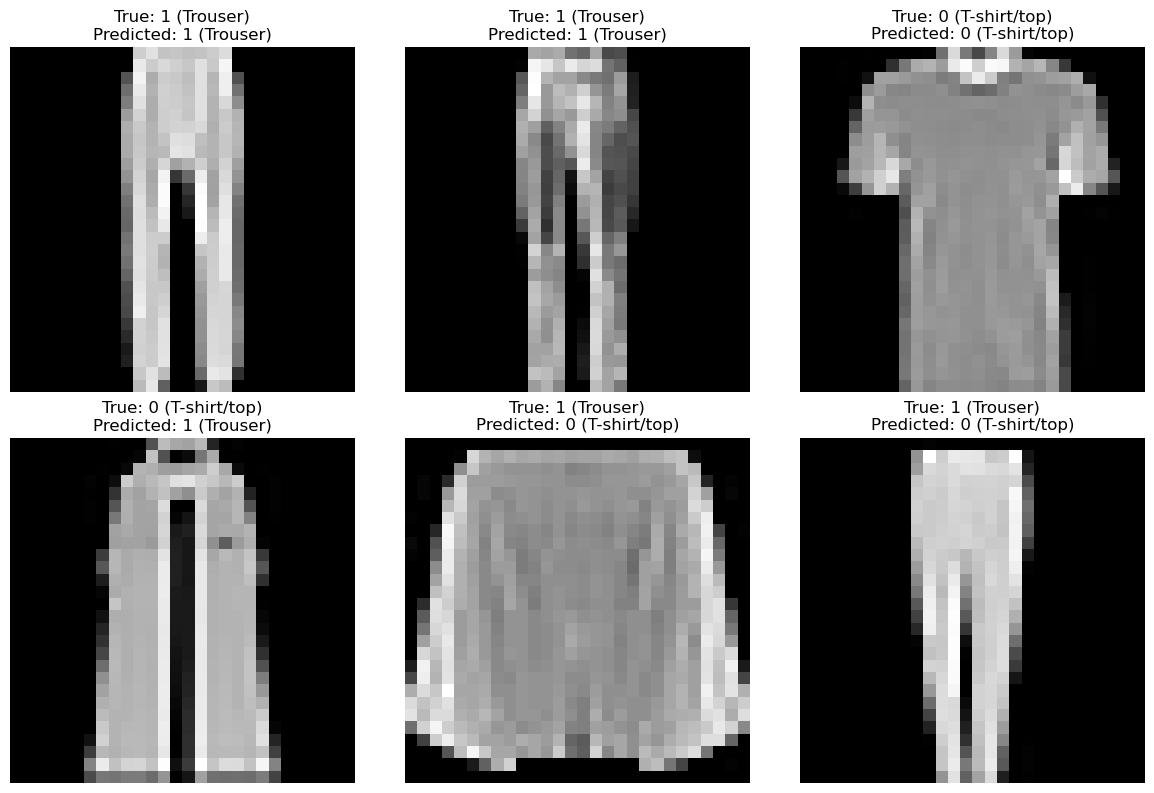

In [33]:
visualize_predictions(binary_results[0], binary_results[1])

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import torch
def evaluate(model, X_test, y_test, task="binary", threshold=0.5):
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        # convert test features to PyTorch tensors
        X_test_t = torch.tensor(X_test, dtype=torch.float32)

        # get model outputs
        outputs = model(X_test_t)

        if task == "binary":
            # for binary classification, apply threshold
            preds = (outputs.squeeze().numpy() >= threshold).astype(int)
        elif task == "multiclass":
            # for multi-class classification, get the class with the highest score
            preds = torch.argmax(outputs, dim=1).numpy()
        else:
            raise ValueError(f"Unsupported task type: {task}. Use 'binary' or 'multiclass'.")

    # calculate accuracy and confusion matrix
    accuracy = accuracy_score(y_test, preds)
    cm = confusion_matrix(y_test, preds)

    return accuracy, cm


Binary Test Accuracy: 0.9808333333333333
Binary Confusion Matrix:


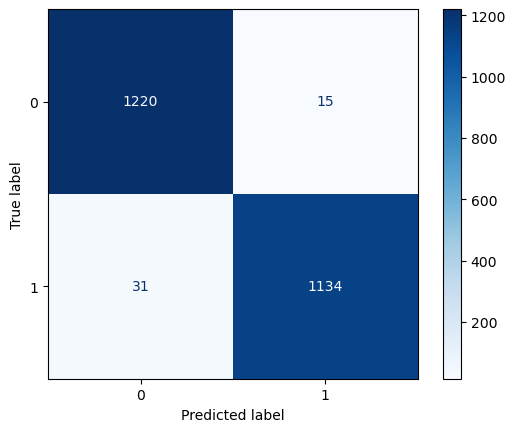

In [35]:
# confusion Matrix for binary classification:
# [[TN, FP],
# [FN, TP]]
accuracy_bin, cm_bin = evaluate(binary_mlp, X_test.values, y_test.values, task="binary")
print("\nBinary Test Accuracy:", accuracy_bin)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bin, display_labels=['0', '1'])
print("Binary Confusion Matrix:")
disp.plot(cmap=plt.cm.Blues)
plt.show()

### **Multi-Class Classification**
In this task, we're going to pick all the 10 classes from the fashion MNIST dataset and show how to use Cross Entropy Loss for the multi class predictions using MLP.

Let's look at the shapes of the binary and multi-class datasets

The below cell helps you convert the dataframe into **numpy arrays** because torch models **cannot understand Series datatypes (dataframes)**
1. It uses all the 784 columns that we created by decomposing an image of size 28x28 as features (X) which the model will learn.
2. It uses the target column to predict the fashion class (y) an image belongs to.



In [36]:
# Let's assume we only take fashion class 0 and 1 for binary classification
# filter the training dataset on fashion class 0 and 1
df_multi = df.copy() # This gets all rows that represent fashion items that belong to class 0 to 9

In [37]:
df_multi.head()

,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,target,fashion_class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,Ankle boot
1,0,0,0,0,0,1,0,0,0,0,...,130,76,0,0,0,0,0,0,0,T-shirt/top
2,0,0,0,0,0,0,0,0,0,22,...,1,0,0,0,0,0,0,0,0,T-shirt/top
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,3,Dress
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T-shirt/top


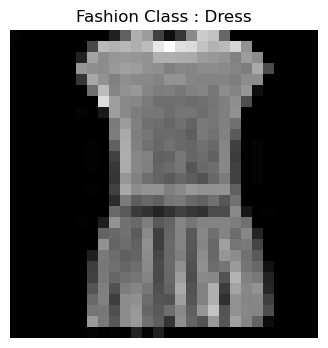

In [38]:
image_no = 3
df_multi = df_multi.reset_index()
display_image(df_multi.iloc[image_no, :784].values, image_no, df_multi)

In [39]:
# Assuming `df` has the image data and the 'fashion_class' column as the labels
X = df_multi.drop(columns=['fashion_class', 'target','index'])  # Features (Image data)
y = df_multi['target']  # Labels (Fashion classes)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
X_test.shape

(12000, 784)

In [42]:
y_train.head()

48572    7
38696    3
13611    5
35213    8
31766    6
Name: target, dtype: int64

In [43]:
multi_train_dataset = MultiClassDataset(X_train, y_train)
multi_test_dataset = MultiClassDataset(X_test, y_test)

In [44]:
multi_train_dataset

#### Hyperparameters

In [45]:
lr = 0.0001 # learning rate
epochs = 10
batch_size = 64
num_classes = 10  # number of classes in FashionMNIST


print('Learning rate:', lr)
print('Batch size:', batch_size)
print('Number of epochs:', epochs)

Learning rate: 0.0001
Batch size: 64
Number of epochs: 10


In [46]:
multi_train_loader = DataLoader(multi_train_dataset, batch_size=batch_size, shuffle=True)
multi_test_loader = DataLoader(multi_test_dataset, batch_size=batch_size, shuffle=False)

In [47]:
multi_train_loader

In [48]:
"""
    MLP architecture for binary classification
        - Input Layer : 784 neurons
        - Activation Function : ReLU()
        - Hidden Layer : 128 neurons(by default)
        - Output Layer : 10 neurons

    - predicts 10 classes
"""
class MultiClassMLP(nn.Module):
    def __init__(self, input_size, hidden_size=128, num_classes=10):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.activation(out)
        out = self.fc2(out)
        return out

display(MultiClassMLP(784))

MultiClassMLP(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (activation): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [49]:
def train(model, loss_fn, optimizer, batch_size=64, epochs=5):
    model.train()  # set the model to training mode
    for epoch in range(epochs):
        total_loss = 0.0
        for batch_idx, (data, labels) in enumerate(multi_train_loader):
            # Forward pass
            outputs = model(data)
            loss = loss_fn(outputs.squeeze(), labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(multi_train_loader)
        print(f"Epoch [{epoch+1}/{epochs}] - Loss: {avg_loss:.4f}")

        # Save the model after every epoch
        torch.save(model.state_dict(), "multi_mlp_model" + '.pth')  # saves it as the model class' name
        print(f"Model saved.")

    # Save the model again after the final epoch
    torch.save(model.state_dict(), "multi_mlp_model" + '.pth')
    print(f"Final model saved.")


In [50]:
# if we want to load a model, we can use:
# model = torch.load("model.pth"))
# model.eval()

In [51]:
# model inference
def predict(model, X_test):
    model.eval()  # set the model to evaluation mode
    predictions = []
    # Ensure X_test is converted to a PyTorch tensor
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

    with torch.no_grad():  # disable gradient computation for inference
        outputs = model(X_test_tensor)  # forward pass
        print(outputs)  # debug: print the shape of the outputs
        probabilities = outputs.squeeze()  # apply sigmoid to logits
        predictions = torch.argmax(outputs, dim=1).numpy()
    return np.array(predictions)


#### Multi-Class Classification Runner

In [52]:
import torch.optim as optim # torch package implementing various optimization algorithms

input_size = X_train.shape[1]                     # number of features in each sample
multi_mlp = MultiClassMLP(input_size)                    # creating an object of the MLP model class
optimizer = optim.SGD(multi_mlp.parameters(), lr=lr) # stochastic gradient descent as optimizer
loss_fn = nn.CrossEntropyLoss()


train(multi_mlp, loss_fn, optimizer, batch_size, epochs=epochs)

Epoch [1/10] - Loss: 2.2321
Model saved.
Epoch [2/10] - Loss: 0.8443
Model saved.
Epoch [3/10] - Loss: 0.6600
Model saved.
Epoch [4/10] - Loss: 0.5831
Model saved.
Epoch [5/10] - Loss: 0.5375
Model saved.
Epoch [6/10] - Loss: 0.5075
Model saved.
Epoch [7/10] - Loss: 0.4850
Model saved.
Epoch [8/10] - Loss: 0.4659
Model saved.
Epoch [9/10] - Loss: 0.4519
Model saved.
Epoch [10/10] - Loss: 0.4390
Model saved.
Final model saved.


In [53]:
random_state = 42 # you can play around with this to sample different examples.
# we usually decide on a number for reproducibility.


def analyze_predictions(X_test, y_test, y_pred):
    # Convert df_analyse to DataFrame if it's a NumPy array or PyTorch tensor
    df_analyse = X_test.copy()

    df_analyse['true_label'] = y_test
    df_analyse['predicted_label'] = y_pred

    # Identify correct and incorrect predictions
    correct_preds = df_analyse[df_analyse['true_label'] == df_analyse['predicted_label']]
    incorrect_preds = df_analyse[df_analyse['true_label'] != df_analyse['predicted_label']]

    # Sample examples for correct and incorrect predictions
    correct_examples = correct_preds.sample(n=min(3, len(correct_preds)), random_state=random_state)
    incorrect_examples = incorrect_preds.sample(n=min(3, len(incorrect_preds)), random_state=random_state)

    print("\nCorrect Predictions:")
    display(correct_examples)

    print("\nIncorrect Predictions:")
    display(incorrect_examples)

    print("-"*40)

    return [correct_examples, incorrect_examples]

In [54]:
X_test.shape

(12000, 784)

In [55]:
# running inference on test set
y_pred_multi = predict(multi_mlp, X_test.values)

# analyze binary predictions
print("Multi-Class Classification: ")
multi_results = analyze_predictions(X_test, y_test, y_pred_multi)

tensor([[ -6.3870, -11.9803,  -2.2636,  ...,  -3.5189,   8.7061,  -7.4847],
        [  3.2827, -13.4282,  -0.2886,  ..., -14.4219,  15.8026, -24.1715],
        [ -3.5877,  -5.4228,  -6.3045,  ...,  12.6412,   4.1017,  -1.7163],
        ...,
        [  1.5268,  -9.7533,  -0.5255,  ...,   2.2293,  13.8488,  -7.1708],
        [ -9.0828,  -7.6217,  -7.6136,  ..., -10.4516,   4.7116,  -7.1516],
        [  0.6424, -11.0316,  -3.8694,  ...,  -0.7349,  -5.5875,   8.6108]])
Multi-Class Classification: 

Correct Predictions:


,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,true_label,predicted_label
46968,0,0,0,0,0,0,0,0,0,34,...,102,49,0,0,0,0,0,0,0,0
13586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
32116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1



Incorrect Predictions:


,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,true_label,predicted_label
7325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,9
52940,0,0,0,0,0,0,0,0,0,0,...,108,63,22,0,0,0,0,0,6,8
43623,0,0,1,0,0,0,0,0,122,37,...,150,161,71,0,3,0,0,0,0,6


----------------------------------------


In [56]:
def visualize_predictions(correct_examples, incorrect_examples):
    """
    Visualize the predictions made by the model.
    - First row: Correct predictions.
    - Second row: Incorrect predictions.
    """

    # Combine correct and incorrect examples into a single DataFrame.
    all_samples = pd.concat([correct_examples, incorrect_examples]).reset_index(drop=True)

    # Check if there are samples to display.
    if all_samples.empty:
        print("No samples to display.")
        return

    # Set up a grid for displaying images (2 rows, 3 columns -> up to 6 images).
    rows, cols = 2, 3
    fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))

    # Flatten the grid of axes into a list for easier access.
    axes_flat = axes.ravel()

    # Loop through the first 6 examples in the DataFrame.
    for i in range(min(6, len(all_samples))):  # Make sure we don't try to plot more than we have.
        row = all_samples.iloc[i]  # Get the current row.

        # Extract the image pixel values and reshape them into a 28x28 grid.
        pixel_values = row.iloc[:784].values  # Assume first 784 columns are pixel values.
        img_2d = pixel_values.reshape(28, 28)

        # Get the true label and predicted label.
        true_lbl = row['true_label']
        pred_lbl = row['predicted_label']

        # Display the image and add labels.
        ax = axes_flat[i]  # Get the current subplot.
        ax.imshow(img_2d, cmap='gray')  # Display the image in grayscale.
        ax.set_title(
            f"True: {true_lbl} ({fashion_mnist_classes[true_lbl]})\n"
            f"Predicted: {pred_lbl} ({fashion_mnist_classes[pred_lbl]})"
        )  # Show the true and predicted labels.
        ax.axis('off')  # Hide the axes for a cleaner look.

    # Turn off any unused plots if there are fewer than 6 images.
    for j in range(len(all_samples), 6):
        axes_flat[j].axis('off')

    # Adjust layout and display the plot.
    plt.tight_layout()
    plt.show()


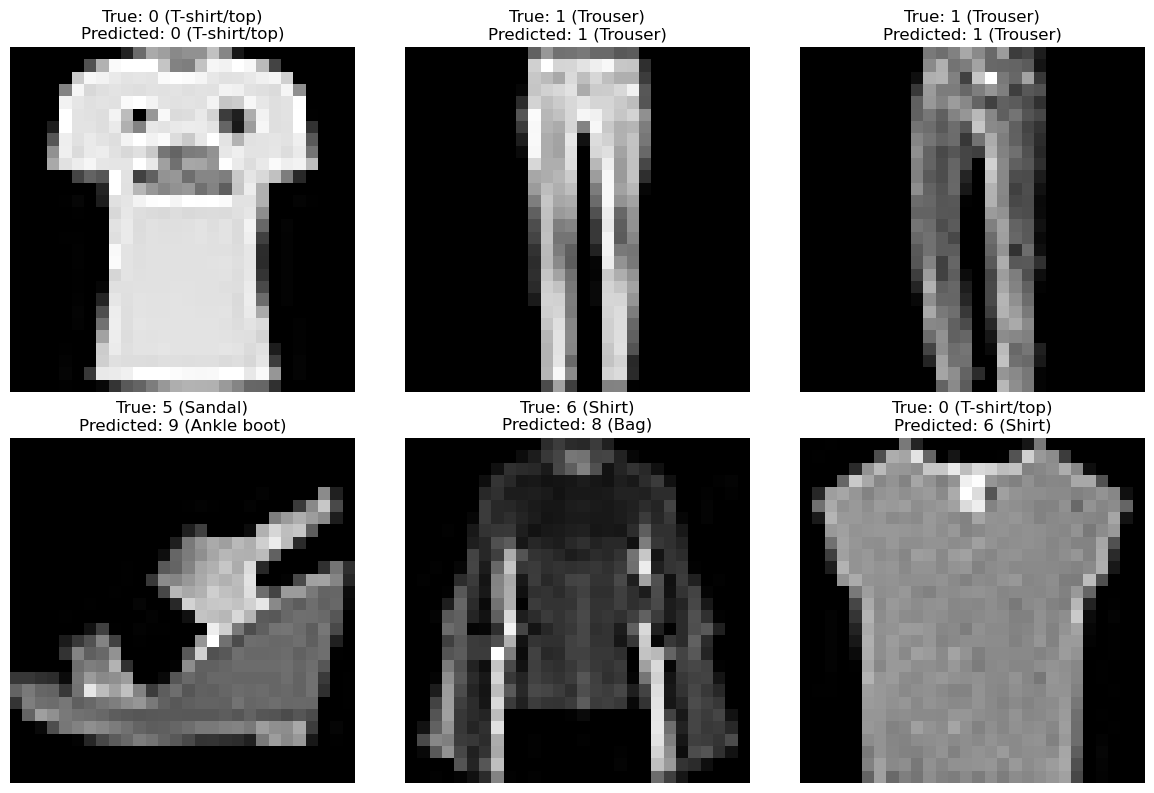

In [57]:
visualize_predictions(multi_results[0], multi_results[1])

Using confusion matrix to evaluate the model.


Multi-Class Test Accuracy: 0.83275
Multi-Class Confusion Matrix:


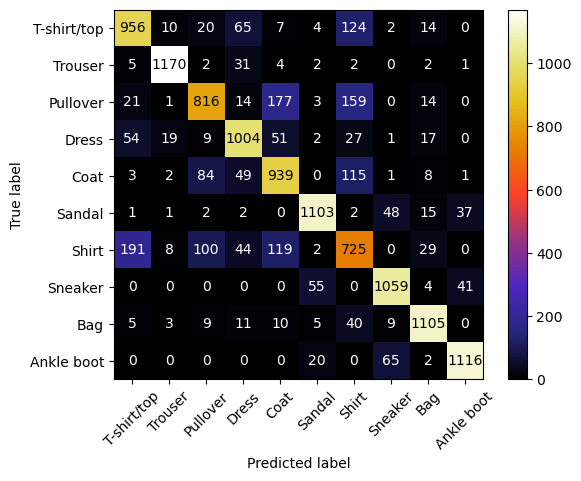

In [58]:
# multi-class classification
accuracy_multi, cm_multi = evaluate(multi_mlp, X_test.values, y_test.values, task="multiclass")
print("\nMulti-Class Test Accuracy:", accuracy_multi)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_multi, display_labels=list(fashion_mnist_classes.values()))
print("Multi-Class Confusion Matrix:")
disp.plot(cmap=plt.cm.CMRmap)
plt.xticks(rotation=45) # rotating the x-axis labels at angle so they are legible
plt.show()